# PRICING DINÁMICO DE HABITACIONES DE HOTEL

*Cristian Rubio Barato*

*Francisco Martínez Esteso*

*José Vicente García López*

*Víctor Ortega Gómez*


## ÍNDICE

1. [ANÁLISIS EXPLORATORIO DE DATOS](#1-análisis-exploratorio-de-datos)  
   1.1 [Análisis Variables Predictoras](#11-análisis-de-variables-predictoras)  
   1.2 [Análisis Univariado](#12-análisis-univariado)  
   1.3 [Análisis Multivariado](#13-análisis-multivariado)  
   1.4 [Correlación de Variables Continuas](#14-correlación-de-variables-continuas)  
   1.5 [Importancia de Variables Continuas](#15-importancia-de-variables-continuas)  

2. [PREPROCESAMIENTO](#2-preprocesamiento)  
   2.1 [Pipeline de Datos](#21-pipeline-de-datos)

## 1. ANÁLISIS EXPLORATORIO DE DATOS

In [167]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv('hotel_booking.csv')

categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Variables Categóricas:", categorical_vars)
print("Variables Continuas:", continuous_vars)

Variables Categóricas: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']
Variables Continuas: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [169]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [170]:
df.drop(columns = ["agent", "company", "arrival_date_week_number", "email", "phone-number", "credit_card", "name"], inplace = True)
df.dropna(inplace = True)

In [171]:
# Pasar "reservation_status_date" a datetime

df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"]).dt.date

df["reservation_status_year"] = pd.to_datetime(df["reservation_status_date"]).dt.year

df = df.drop(df[df["reservation_status_year"] == 2014].index)

In [172]:
# Pasar "arrival_date_month" y "children" a enteros

df["arrival_date_month"] = pd.to_datetime(df["arrival_date_month"], format = "%B").dt.month

df["children"] = df["children"].astype(int)

In [173]:
y = df['adr']
X = df.drop(columns=['adr'])

### 1.1 Análisis Variables Predictoras

In [174]:
X.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status_year
count,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000,118717.000000
mean,0.370393,104.029617,2016.159421,6.551345,15.800854,0.930305,2.502902,1.858175,0.104366,0.007960,0.030543,0.085582,0.131835,0.221518,2.334308,0.061979,0.572555,2016.097728
std,0.482912,106.737483,0.706551,3.089032,8.779217,0.996318,1.901514,0.578990,0.399456,0.097454,0.172077,0.843575,1.485794,0.653225,17.643652,0.244346,0.792967,0.711241
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,0.000000,18.000000,2016.000000,4.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
50%,0.000000,69.000000,2016.000000,7.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000
75%,1.000000,160.000000,2017.000000,9.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2017.000000
max,1.000000,737.000000,2017.000000,12.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,8.000000,5.000000,2017.000000


In [175]:
df["is_canceled"].value_counts(normalize = True) * 100

0    62.960654
1    37.039346
Name: is_canceled, dtype: float64

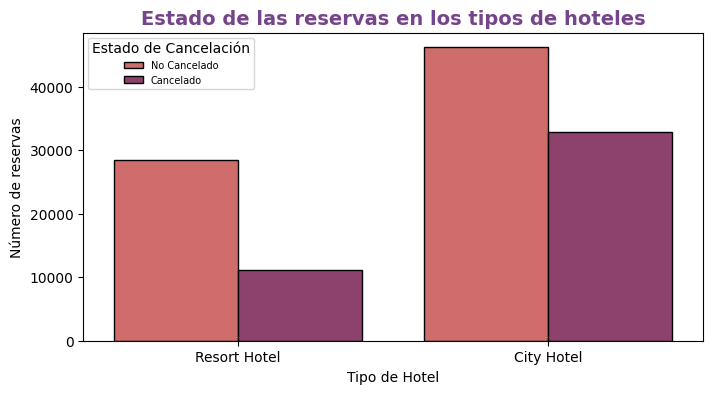

In [176]:
plt.figure(figsize=(8, 4))

sns.countplot(data=X, x="hotel", 
              hue=X["is_canceled"].map({0: "No Cancelado", 1: "Cancelado"}),  
              edgecolor="k", palette="flare")

plt.title("Estado de las reservas en los tipos de hoteles", size=14, weight="bold", color="#76448A")
plt.xlabel("Tipo de Hotel")
plt.ylabel("Número de reservas")
plt.legend(title="Estado de Cancelación", fontsize=7)

plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2496\1934864472.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=X,
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2496\1934864472.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([month_mapping[m] for m in sorted(X["arrival_date_month"].unique())])


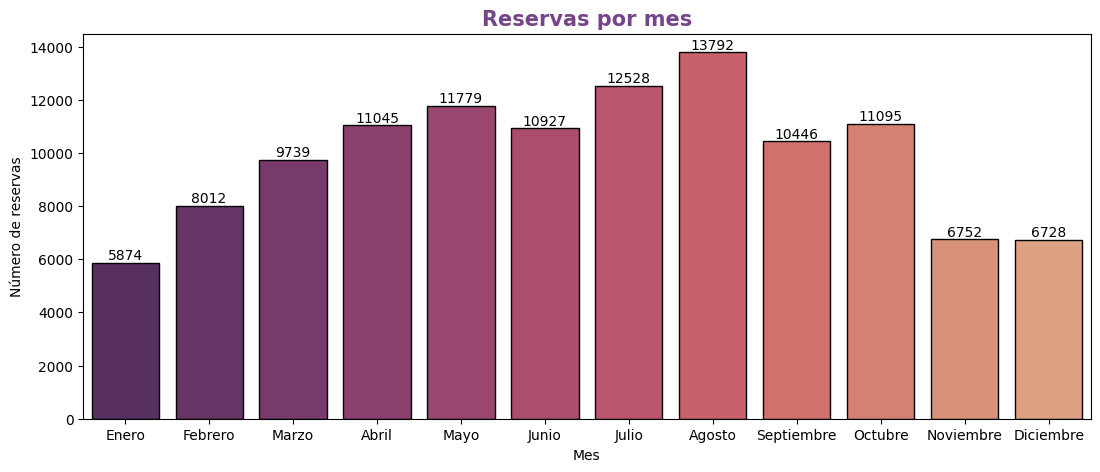

In [177]:
month_mapping = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio",
    7: "Julio", 8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

plt.figure(figsize=(13, 5))

ax = sns.countplot(data=X, 
                   x=X["arrival_date_month"],  
                   edgecolor="k", palette="flare_r", 
                   order=sorted(X["arrival_date_month"].unique()))  

ax.set_xticklabels([month_mapping[m] for m in sorted(X["arrival_date_month"].unique())])

for index, value in enumerate(X["arrival_date_month"].value_counts().sort_index()):
    ax.text(index, value, str(int(value)), ha="center", va="bottom", fontsize=10)

plt.title("Reservas por mes", size=15, color="#76448A", weight="bold")
plt.xlabel("Mes")
plt.ylabel("Número de reservas")

plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2496\3091935769.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([month_mapping[m] for m in sorted(X["arrival_date_month"].unique())])


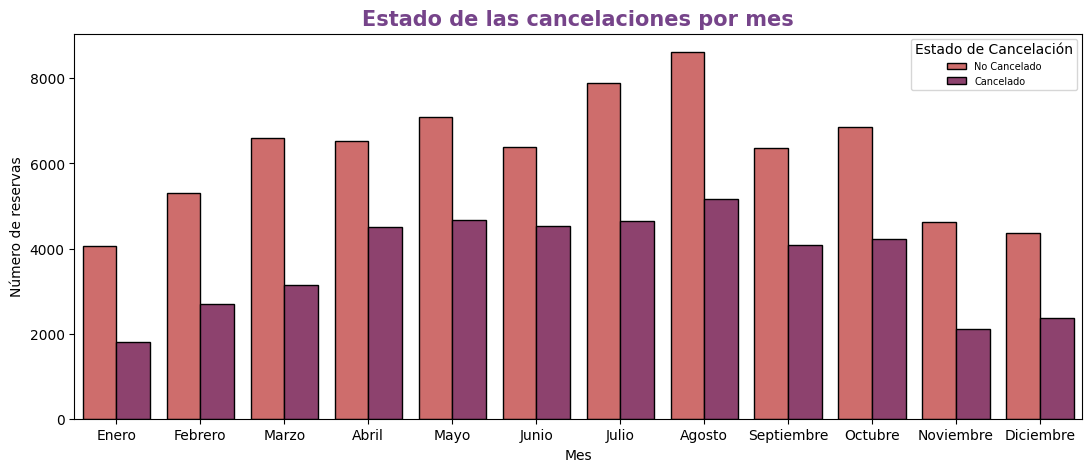

In [178]:

plt.figure(figsize=(13, 5))

ax = sns.countplot(data=X, x="arrival_date_month", hue=X["is_canceled"].map({0: "No Cancelado", 1: "Cancelado"}), 
                   edgecolor="k", palette="flare", order=sorted(X["arrival_date_month"].unique()))

ax.set_xticklabels([month_mapping[m] for m in sorted(X["arrival_date_month"].unique())])

ax.legend(title="Estado de Cancelación", fontsize=7)

plt.title("Estado de las cancelaciones por mes", size=15, color="#76448A", weight="bold")
plt.xlabel("Mes")
plt.ylabel("Número de reservas")

plt.show()


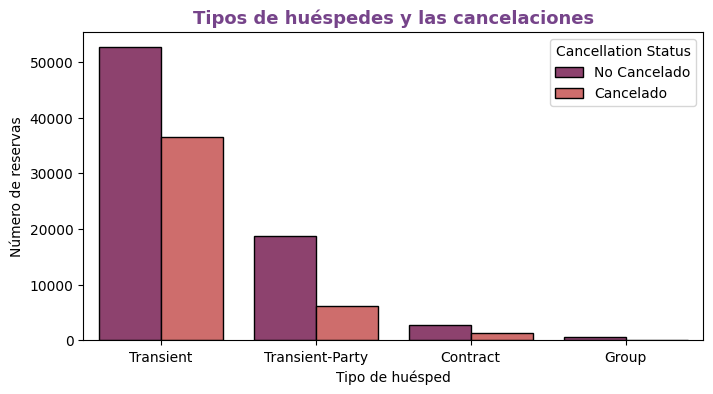

In [179]:
plt.figure(figsize=(8, 4))

ax = sns.countplot(data=X, 
                   x="customer_type", 
                   order=X["customer_type"].value_counts().index, 
                   hue=X["is_canceled"].map({0: "No Cancelado", 1: "Cancelado"}),  
                   edgecolor="k", palette="flare_r")

plt.title("Tipos de huéspedes y las cancelaciones", size=13, weight="bold", color="#76448A")
plt.xlabel("Tipo de huésped")
plt.ylabel("Número de reservas")

plt.legend(title="Cancellation Status", labels=["No Cancelado", "Cancelado"])

plt.show()

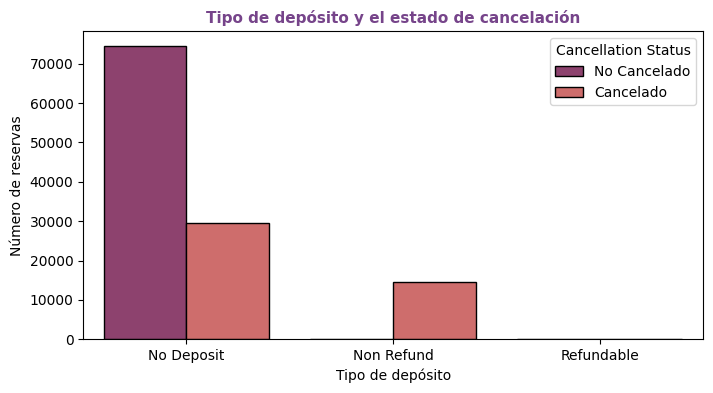

In [180]:
plt.figure(figsize=(8, 4))

ax = sns.countplot(data=X, 
                   x="deposit_type", 
                   order=X["deposit_type"].value_counts().index, 
                   hue=X["is_canceled"].map({0: "No Cancelado", 1: "Cancelado"}), 
                   edgecolor="k", palette="flare_r")

plt.title("Tipo de depósito y el estado de cancelación", size=11, weight="bold", color="#76448A")
plt.xlabel("Tipo de depósito")
plt.ylabel("Número de reservas")

plt.legend(title="Cancellation Status", labels=["No Cancelado", "Cancelado"])

plt.show()


### 1.2 Análisis Univariado

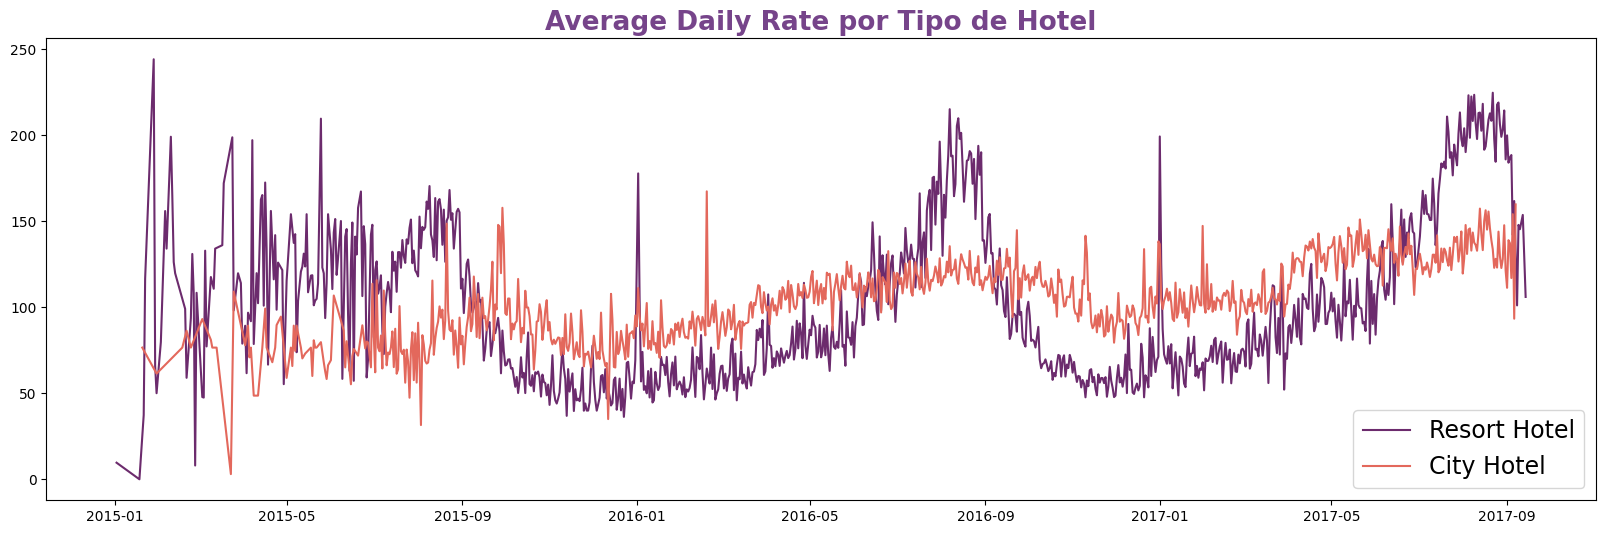

In [181]:
resort_hotel_adr = df[df["hotel"] == "Resort Hotel"].groupby("reservation_status_date")["adr"].mean().reset_index()
resort_hotel_adr.sort_values("reservation_status_date", inplace = True)

city_hotel_adr = df[df["hotel"] == "City Hotel"].groupby("reservation_status_date")["adr"].mean().reset_index()
city_hotel_adr.sort_values("reservation_status_date", inplace = True)
start_date = datetime.strptime("2015-01", "%Y-%m").date()
end_date = datetime.strptime("2017-10", "%Y-%m").date()

resort_hotel_adr = resort_hotel_adr[(resort_hotel_adr["reservation_status_date"] > start_date) &
                                    (resort_hotel_adr["reservation_status_date"] < end_date)]

city_hotel_adr = city_hotel_adr[(city_hotel_adr["reservation_status_date"] > start_date) &
                                (city_hotel_adr["reservation_status_date"] < end_date)]
plt.figure(figsize = (20, 6))

colors = sns.color_palette("flare_r")

plt.plot(resort_hotel_adr["reservation_status_date"], resort_hotel_adr["adr"], label = "Resort Hotel", color = colors[0])
plt.plot(city_hotel_adr["reservation_status_date"], city_hotel_adr["adr"], label = "City Hotel", color = colors[4])

plt.title("Average Daily Rate por Tipo de Hotel", size = 19, weight = "bold", color = "#76448A")
plt.legend(fontsize = 17, loc = "lower right")

plt.show()

### 1.3 Análisis Multivariado

### 1.4 Correlación de Variables Continuas

### 1.5 Importancia de Vriables Continuas

## 2. PREPROCESAMIENTO

### 2.1 Pipeline de Datos